# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **economic activity or measures**?  For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)





#  Becoming an independent Data Scientist

### State the region and the domain category that your data sets are about
Region: Ann Arbor, MI, USA

Topic: economic activity or measures

### Research question about the domain category and region
How have the unemployment rate and Personal Income per Capita changed over the last two decades in Ann Arbor county (Washtenaw County) compared to the whole Michigan state and country?

###  Used publicly accessible datasets
The website from the Economic Research of the Federal bank of St Louis was used, which at the same time retrieves the data from the  U.S. Bureau of Labor Statistics (so it is a trusty reesource) but in a more orderly manner. The data was downloaded as csv files.

* For the unemployment rate
    * USA unemployment rate: https://fred.stlouisfed.org/series/UNRATE#0
    * MI unemployment rate: https://fred.stlouisfed.org/series/MIUR#0
    * Washtenaw County unemployment rate: https://fred.stlouisfed.org/series/MIWASH1URN#0

* For the Personal Income per Capita
    * USA Personal Income per Capita: https://fred.stlouisfed.org/series/A792RC0A052NBEA
    * MI Personal Income per Capita: https://fred.stlouisfed.org/series/MIPCPI
    * Washtenaw County Personal Income per Capita: https://fred.stlouisfed.org/series/PCPI26161



# Code
### Let's start importing the libraries we will use

In [1]:
# First we import the necessary modules
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import matplotlib.colors as col
import matplotlib.cm as cm
from matplotlib.widgets import Slider

### Now we will import the csv files as dataframes and clean them

In [4]:
# Lets import the data from the csv files:
df_usa_unem = pd.read_csv('Unemployment+Rate+USA.csv')
df_usa_pic = pd.read_csv('Personal+income+per+capita+USA.csv')

df_mi_unem = pd.read_csv('Unemployment+Rate+MI.csv')
df_mi_pic = pd.read_csv('Personal+income+per+capita+MI.csv')

df_wash_unem = pd.read_csv('Unemployment+Rate+Washtenaw+County.csv')
df_wash_pic = pd.read_csv('Personal+income+per+capita+Washtenaw+County.csv')

# Lets merge now the dataframes now at every level (country, state and county) and clean them a little bit
df_usa = pd.merge(df_usa_unem, df_usa_pic, on='DATE', how='inner')
df_usa.iloc[:,0] = pd.to_datetime(df_usa.iloc[:,0]).dt.year
##df_usa.iloc[:,0] = df_usa.iloc[:,0].str.slice(start=0, stop=4).astype(np.float64)
df_usa.iloc[:,1] = df_usa.iloc[:,1].round(2)
df_usa.columns = ['Year','Unemployment Rate', 'PIC']

df_mi = pd.merge(df_mi_unem, df_mi_pic, on='DATE', how='inner')
df_mi.iloc[:,0] = pd.to_datetime(df_mi.iloc[:,0]).dt.year
##df_mi.iloc[:,0] = df_mi.iloc[:,0].str.slice(start=0, stop=4).astype(np.float64)
df_mi.iloc[:,1] = df_mi.iloc[:,1].round(2)
df_mi.columns = ['Year','Unemployment Rate', 'PIC']
                 
df_wash = pd.merge(df_wash_unem, df_wash_pic, on='DATE', how='inner')
df_wash.iloc[:,0] = pd.to_datetime(df_wash.iloc[:,0]).dt.year
##df_wash.iloc[:,0] = df_wash.iloc[:,0].str.slice(start=0, stop=4).astype(np.float64)
df_wash.iloc[:,1] = df_wash.iloc[:,1].round(2)
df_wash.columns = ['Year','Unemployment Rate', 'PIC']


df_usa


(    Year  Unemployment Rate      PIC
 0   2000               3.97  30640.0
 1   2001               4.74  31574.0
 2   2002               5.78  31807.0
 3   2003               5.99  32645.0
 4   2004               5.54  34219.0
 5   2005               5.08  35806.0
 6   2006               4.61  38089.0
 7   2007               4.62  39801.0
 8   2008               5.80  40855.0
 9   2009               9.28  39250.0
 10  2010               9.61  40518.0
 11  2011               8.93  42713.0
 12  2012               8.07  44588.0
 13  2013               7.36  44826.0
 14  2014               6.16  47050.0
 15  2015               5.28  48998.0
 16  2016               4.88  50004.0
 17  2017               4.34  52114.0
 18  2018               3.89  54601.0,
     Year  Unemployment Rate      PIC
 0   2000               3.65  30409.0
 1   2001               5.18  30796.0
 2   2002               6.28  30671.0
 3   2003               7.18  31327.0
 4   2004               7.02  32165.0
 5   2005  

### Time to plot

<IPython.core.display.Javascript object>


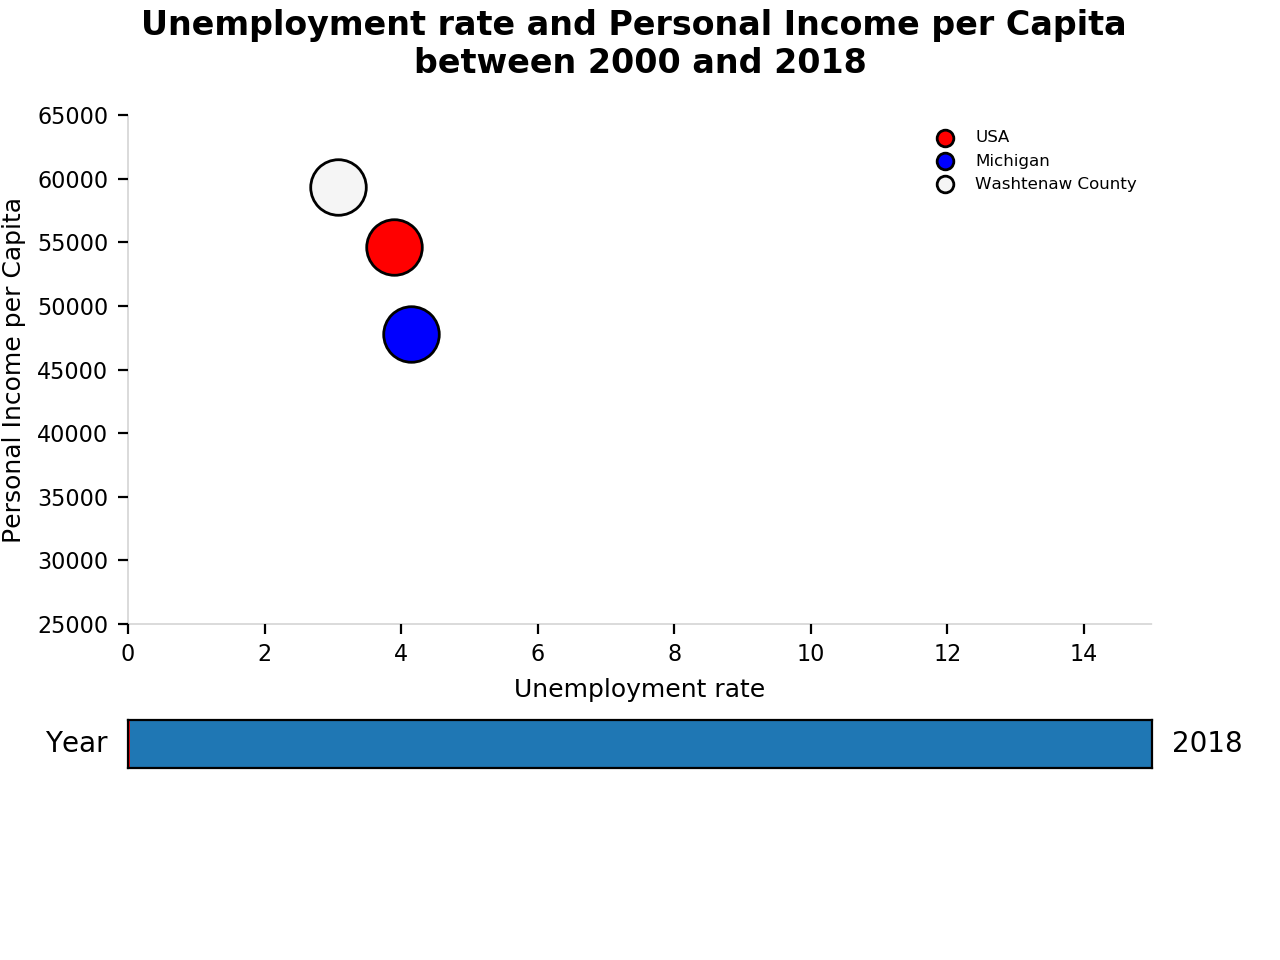

In [3]:
# We will do scatter plots, x axis is the unemployment rate, y axis is the PIC

# First we set a basic plot, selecting the rows for year 2000. Later with the slider we will be able to select the year

data1 = df_usa[df_usa.Year == 2000].reset_index()    
data2 = df_mi[df_mi.Year == 2000].reset_index()      
data3 = df_wash[df_wash.Year == 2000].reset_index()
      

fig, ax = plt.subplots()
plt.subplots_adjust(left = 0.1, bottom = 0.35) # We leave space under the plot for the slider


p1 = plt.scatter(data1['Unemployment Rate'], data1['PIC'],
                s=400, linewidths=1, c = 'red', edgecolors='black', picker = 5)
    
    
p2 = plt.scatter(data2['Unemployment Rate'], data2['PIC'], 
                s= 400, linewidths = 1, c = 'blue', edgecolors = 'black', picker = 5)
    
p3 = plt.scatter(data3['Unemployment Rate'], data3['PIC'], 
                s=400, linewidths = 1, c = 'whitesmoke', edgecolors = 'black', picker = 5)
    
# The axis are limited to meaningful values
plt.gca().set_xlim([0, 15])
plt.gca().set_ylim([25000,65000])

# For a cleaner graph, we delete the useless spines (top and right) amd draw thinner the bottom and left ones
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.1)
plt.gca().spines['bottom'].set_linewidth(0.1)

# The legend, axis labels and title are defined
plt.legend(["USA", "Michigan", "Washtenaw County"],loc ="upper right", markerscale=0.3, fontsize=6, frameon=False)
plt.gca().set_xlabel("Unemployment rate", fontsize=9)
plt.gca().set_ylabel("Personal Income per Capita",fontsize=9)
plt.gca().set_title('Unemployment rate and Personal Income per Capita \nbetween 2000 and 2018',fontsize = 12, fontweight = 'bold')
plt.gca().title.set_position([.5, 1.05])
plt. xticks(fontsize=8)
plt. yticks(fontsize=8)

# The slider object is created after setting its position
Slider_year = plt.axes([0.1,0.2,0.8,0.05]) # Slider position
sldr = Slider(Slider_year, 'Year', valmin = 2000, valmax = 2018, # Slider creation 
              valinit=2000,valfmt='%1.0f', valstep = 1)


# A function which uses the slider value to modify the plot needs to be defined:
def val_update(val):
    x1 = df_usa[df_usa.Year == sldr.val].reset_index()['Unemployment Rate']
    y1 = df_usa[df_usa.Year == sldr.val].reset_index()['PIC']
        
    x2 = df_mi[df_mi.Year == sldr.val].reset_index()['Unemployment Rate']
    y2 = df_mi[df_mi.Year == sldr.val].reset_index()['PIC']
        
    x3 = df_wash[df_wash.Year == sldr.val].reset_index()['Unemployment Rate']
    y3 = df_wash[df_wash.Year == sldr.val].reset_index()['PIC']
    
    # The coordinates modified by the Slider event are passed to the corresponding plots
    xy1 = np.vstack ((x1, y1))
    p1.set_offsets (xy1.T)
    
    xy2 = np.vstack ((x2, y2))
    p2.set_offsets (xy2.T)
    
    xy3 = np.vstack ((x3, y3))
    p3.set_offsets (xy3.T)
    
    plt.draw()


# Finally the connection between slider event and function needs to be made:
sldr.on_changed(val_update)


plt.show()